In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10,6)


# Data Loading...

In [2]:
df1=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Deleting not needed columns from dataset

In [6]:
df2=df1.drop(columns=['area_type','availability','society','balcony'])

In [7]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning...

Data cleaning starts with finding Na values, and removing them or replacing them

In [8]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

dropping all na values

In [10]:
df3=df2.dropna()

In [11]:
df3.shape

(13246, 5)

In [12]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [14]:
df3.nunique()

location      1304
size            31
total_sqft    2067
bath            19
price         1955
dtype: int64

In [15]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df3['BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-16-6fca8bf23756>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [17]:
df3.head(30)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [18]:
df3.shape

(13246, 6)

In [19]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
df3[df3.BHK>10]

,location,size,total_sqft,bath,price,BHK
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,150.0,11


### Always Check for unique values in perticular to check the series in good form or not

In [21]:
df3[df3.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In above case 43bedroom in 2400sq.ft look suspecious? if yes the check for unique values  in total _sqft col

In [22]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

'1133 - 1384' this is not standard form in series, so we have to convert it into the standard form by taking the mean of it replacing it with mean

In [23]:
def is_float(x):
    try:
        x=float(x)
    except:
        return False
    return True

Above Function is to find out weather the given x value is float or not , and converts x into float

In [24]:
is_float('1056')

True

In [25]:
df3[df3['total_sqft'].apply(is_float)].head(30)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


applying is_float() on the df3['Sqrt'] coln where x is total_sqrt

#### Now this is typical problem in data cleaning where data is not uniform  

In [26]:
def con_sqrt_to_num(x):
    tokens= x.split('-')
    if len(tokens)==2:
        return  (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return False

In [27]:
con_sqrt_to_num('123')

123.0

In [28]:
con_sqrt_to_num('600-200')

400.0

In [29]:
x='200-300'
tokens= x.split('-')
print(tokens)

['200', '300']


In [30]:
df4=df3.copy()

In [31]:
df4['total_sqft']=df4['total_sqft'].apply(con_sqrt_to_num)

In [32]:
df4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [33]:
def is_float(x):
    try:
        x=float(x)
    except:
        return false
    return x

In [35]:
df4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [36]:
df5=df4.copy()

# Feature Engineering And Dimmensionality Reduction 

In [37]:
df5.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


Creating New Feature called price_per_sqft

In [38]:
df5['price_per_sqft']=df5["price"]*100000

In [40]:
df4.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [41]:
df5=df4.head()

In [42]:
df7=df4.copy()

In [43]:
df7.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [44]:
def con_int(x):
    if x:
        x=int(x)
        
    else:
        return False
    return x 

In [45]:
con_int(40.4)

40

In [46]:
df7['new_price']=df7['price'].apply(con_int)
df7.head()

,location,size,total_sqft,bath,price,BHK,new_price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,39
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,120
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,62
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,95
4,Kothanur,2 BHK,1200,2.0,51.00,2,51


In [47]:
df7['price_per_sqft']=df7.new_price*100000

In [48]:
df7["price_per_sqft"]

0         3900000
1        12000000
2         6200000
3         9500000
4         5100000
           ...   
13315    23100000
13316    40000000
13317     6000000
13318    48800000
13319     1700000
Name: price_per_sqft, Length: 13246, dtype: int64

In [49]:
df7.head()

,location,size,total_sqft,bath,price,BHK,new_price,price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,39,3900000
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,120,12000000
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,62,6200000
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,95,9500000
4,Kothanur,2 BHK,1200,2.0,51.00,2,51,5100000


In [50]:
#float(df7.total_sqft)

In [51]:
df7.astype({'total_sqft': 'float'}).dtypes
df7.total_sqft

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13246, dtype: object

In [52]:
df7=df7.drop(columns=['new_price','price_per_sqft'])

In [53]:
df7.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [54]:
len(df7.location.unique())

1304

In [55]:
df4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [56]:
sqft=df7.total_sqft


In [57]:
sqft

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13246, dtype: object

In [58]:
def is_float(x):
    try:
        x=float(x)
    except:
        return false
    return x

In [59]:
df7['total_sqft_new']=sqft.apply(is_float)

In [60]:
df7.head()

,location,size,total_sqft,bath,price,BHK,total_sqft_new
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [61]:
df7.drop(columns=['total_sqft']).head()

,location,size,bath,price,BHK,total_sqft_new
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,2.0,51.00,2,1200.0


In [62]:
df7['price_per_sqft']=df7['price']*100000/df7['total_sqft_new']

In [63]:
df9=df7.copy()

In [64]:
df9=df9.drop(columns=['total_sqft'])

In [65]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13246 non-null  object 
 1   size            13246 non-null  object 
 2   bath            13246 non-null  float64
 3   price           13246 non-null  float64
 4   BHK             13246 non-null  int64  
 5   total_sqft_new  13246 non-null  float64
 6   price_per_sqft  13246 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 827.9+ KB


In [66]:
df9.head()

,location,size,bath,price,BHK,total_sqft_new,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000


In [67]:
df9.location.nunique()

1304

In following piece of code i have grouped the locations, because i wanna se the in which locations how many data points are there, if there are less than  10 then i can put it in other catagories

In [68]:
location_stats=df9.groupby("location")['location'].agg('count')
location_stats.sort_values(ascending=False)

location
Whitefield                            534
Sarjapur  Road                        392
Electronic City                       302
Kanakpura Road                        266
Thanisandra                           233
                                     ... 
Konappana Agrahara                      1
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
 Anekal                                 1
Name: location, Length: 1304, dtype: int64

In [69]:
location_stats.sort_values(ascending=False)

location
Whitefield                            534
Sarjapur  Road                        392
Electronic City                       302
Kanakpura Road                        266
Thanisandra                           233
                                     ... 
Konappana Agrahara                      1
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
 Anekal                                 1
Name: location, Length: 1304, dtype: int64

In [70]:
other_locations=location_stats[location_stats<=10]

In [71]:
other_locations.sort_values(ascending=False)

location
Nagappa Reddy Layout                            10
Nagadevanahalli                                 10
Gunjur Palya                                    10
Sadashiva Nagar                                 10
1st Block Koramangala                           10
                                                ..
Laxminarayana Layout                             1
Lalbagh Road                                     1
Lakshmipura Vidyaanyapura                        1
Lakshminarayanapura, Electronic City Phase 2     1
 Anekal                                          1
Name: location, Length: 1063, dtype: int64

In [72]:
len(other_locations)

1063

In [73]:
df9['location'].nunique()

1304

In [74]:

df9.location=df9.location.apply(lambda x: "other" if x in other_locations else x )

In [75]:
df9.location.nunique()

242

#### This is how u handle dimmensional cures

In [76]:
df10=df9.copy()

In [77]:
df10.head(50)

,location,size,bath,price,BHK,total_sqft_new,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.00,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.00,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.00,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.00,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.00,4250.000000
5,Whitefield,2 BHK,2.0,38.00,2,1170.00,3247.863248
6,Old Airport Road,4 BHK,4.0,204.00,4,2732.00,7467.057101
7,Rajaji Nagar,4 BHK,4.0,600.00,4,3300.00,18181.818182
8,Marathahalli,3 BHK,3.0,63.25,3,1310.00,4828.244275
9,other,6 Bedroom,6.0,370.00,6,1020.00,36274.509804


In [78]:
f=df10.groupby('location')['location'].agg('count')

In [79]:
f.sort_values(ascending=False)

location
other                 2896
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
                      ... 
Thyagaraja Nagar        11
HAL 2nd Stage           11
Tindlu                  11
Pattandur Agrahara      11
Nehru Nagar             11
Name: location, Length: 242, dtype: int64

## Removing Outliers 

In [80]:
def remove_outlier(df):
    df_out=pd.DataFrame(df)
    return df_out
    
        

In [81]:
remove_outlier(df10)

,location,size,bath,price,BHK,total_sqft_new,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,4.0,231.00,5,3453.0,6689.834926
13316,other,4 BHK,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4 BHK,4.0,488.00,4,4689.0,10407.336319


In [82]:
df10[df10['total_sqft_new']/df10['BHK']<300].head()

,location,size,bath,price,BHK,total_sqft_new,price_per_sqft
9,other,6 Bedroom,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,8 Bedroom,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,6 Bedroom,4.0,150.0,6,1407.0,10660.980810
68,other,8 Bedroom,7.0,85.0,8,1350.0,6296.296296
70,other,3 Bedroom,3.0,100.0,3,500.0,20000.000000


In [83]:
df10.shape

(13246, 7)

In [84]:
df11=df10[~(df10['total_sqft_new']/df10['BHK']<300)]

In [85]:
df11.shape

(12456, 7)

In [86]:
df11

,location,size,bath,price,BHK,total_sqft_new,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,4.0,231.00,5,3453.0,6689.834926
13316,other,4 BHK,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4 BHK,4.0,488.00,4,4689.0,10407.336319


In [87]:
df11.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Following function is used to remove outlier in price_sqft column, we only take those data point which are lie in between 1st range of standard deviation other than that we are gonna remove those outliers 

In [88]:
import numpy as np 
def remove_outlier(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean=np.mean(subdf['price_per_sqft'])
        std=np.std(subdf['price_per_sqft'])
        reduced_df=subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean+std))]
        df_out=pd.concat([df_out,reduced_df])
    return df_out

In [89]:
df12=remove_outlier(df11)
df12.shape
df13=df12.copy()

In [90]:
#Now, after reading dataset, i have found that price is not equally distrubuted according BHK
#because in some case price for 2bhk is higher than 3bhk, so to find these points vusually...

In [91]:
import matplotlib.pyplot as plt

def plot_scatter(df,location):
    bhk2=df[(df.location==location) & (df.BHK==2)]
    bhk3=df[(df.location==location) & (df.BHK==3)]
    
    
    plt.style.use('seaborn')
    plt.rcParams['figure.figsize']=(15,8)
    
    plt.scatter(bhk2.total_sqft_new,bhk2.price,color='red',s=30,label="2bhk",edgecolors='black')
    plt.scatter(bhk3.total_sqft_new,bhk3.price,color='Blue',s=20,label='3Bhk',edgecolors='Green')
    
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.legend()
    



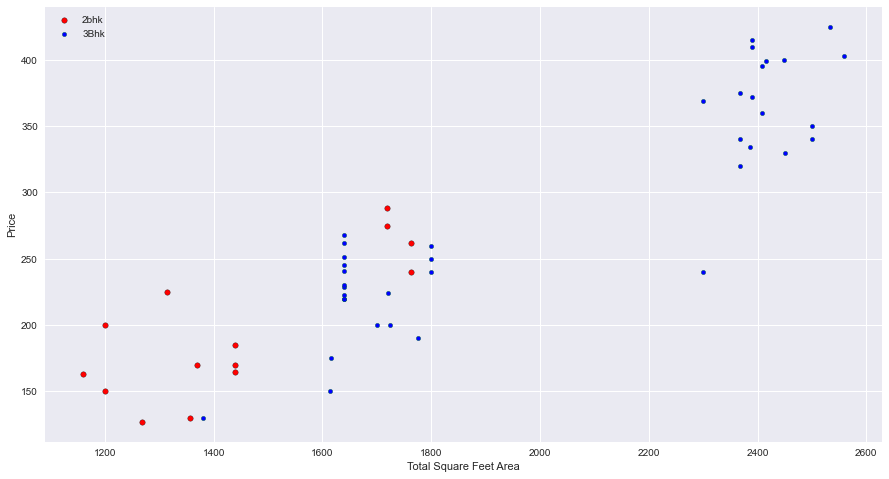

In [92]:
plot_scatter(df12,'Rajaji Nagar')

So about following Function.

1.This function created for the comparing stats of bhks', for example stats of 3 bhk is lower than stats of 2 bhk then this function will drop that kind of impurity from the data set.

2. Stats are nothing but the mean ,std of the price per square feet of dataframe and count variable counts the number of bhk lie in bhk_df

3. And there is stats variable which get the stast of previous bhk , example if am looking for the stats of 3 bhk, in this case stats variable store the stats of 2 bhk 

4. In IF_statement  it check if bhk_count is greater than 5 means its has more than 5 data points or rows then it will compare current bhk.price_per_sqft to the mean of previous bhk.price_per_sqft

In [93]:
import numpy as np
def bhk_outliers(df):
    exclude_outlier=np.array([])
    for location,location_df in df.groupby('location'):
        
        bhk_stats={}
        
        for bhk,bhk_df in df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
       
        for bhk,bhk_df in df.groupby('BHK'):
             stats= bhk_stats.get(bhk-1)
        
        if stats and stats['count']>5:
            exclude_outlier=pd.concat(exclude_outlier,bhk_df[bhk_df.price_per_sqft<stats['mean']].index.value)
        
        
        return df.drop(exclude_outlier,axis=0)
           
            

In [94]:
df13.shape

(10244, 7)

In [95]:
df14=remove_outlier(df13)

In [96]:
df14.shape

(6970, 7)

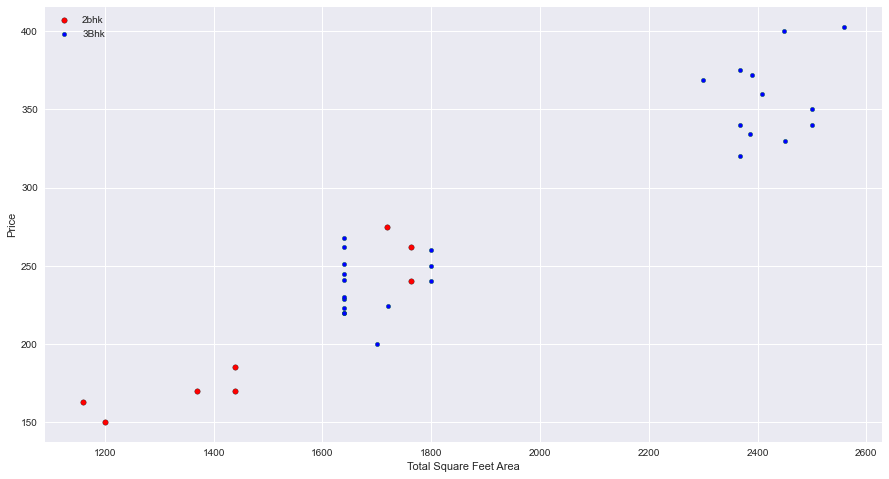

In [97]:
plot_scatter(df14,'Rajaji Nagar')

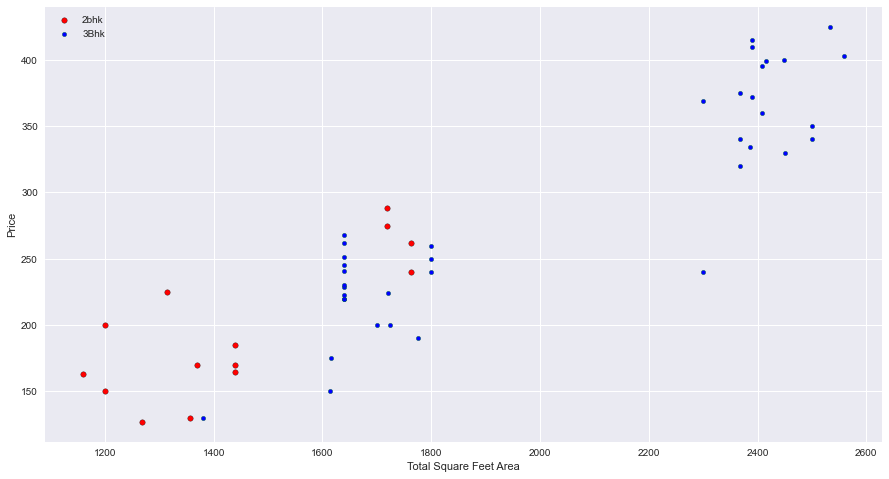

In [98]:
plot_scatter(df13,'Rajaji Nagar')

In [99]:
df13.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [100]:
df13[df13.bath>10]

,location,size,bath,price,BHK,total_sqft_new,price_per_sqft
8636,Neeladri Nagar,10 BHK,12.0,160.0,10,4000.0,4000.000000
3096,other,10 BHK,12.0,525.0,10,12000.0,4375.000000
3609,other,16 BHK,16.0,550.0,16,10000.0,5500.000000
7979,other,11 BHK,12.0,150.0,11,6000.0,2500.000000
9935,other,13 BHK,13.0,275.0,13,5425.0,5069.124424


In [101]:
df14.shape

(6970, 7)

In [102]:
df15=df14[~(df14.bath>8)& (df14.bath<7000)]

In [103]:
df15

,location,size,bath,price,BHK,total_sqft_new,price_per_sqft
152,Devarachikkanahalli,3 BHK,2.0,44.00,3,1250.0,3520.000000
5030,Devarachikkanahalli,2 BHK,2.0,40.00,2,1170.0,3418.803419
5771,Devarachikkanahalli,3 BHK,2.0,65.00,3,1425.0,4561.403509
6591,Devarachikkanahalli,2 BHK,2.0,43.00,2,947.0,4540.654699
8268,Devarachikkanahalli,2 BHK,2.0,58.00,2,1230.0,4715.447154
...,...,...,...,...,...,...,...
13264,other,2 BHK,2.0,57.00,2,1095.0,5205.479452
13278,other,2 BHK,2.0,65.00,2,1256.0,5175.159236
13285,other,2 BHK,2.0,110.00,2,1353.0,8130.081301
13292,other,3 BHK,2.0,63.93,3,1440.0,4439.583333


In [104]:
df16=df15.drop(columns=['size','price_per_sqft'])

In [105]:
df16.head(50)

,location,bath,price,BHK,total_sqft_new
152,Devarachikkanahalli,2.0,44.00,3,1250.0
5030,Devarachikkanahalli,2.0,40.00,2,1170.0
5771,Devarachikkanahalli,2.0,65.00,3,1425.0
6591,Devarachikkanahalli,2.0,43.00,2,947.0
8268,Devarachikkanahalli,2.0,58.00,2,1230.0
8954,Devarachikkanahalli,3.0,75.00,3,1705.0
9894,Devarachikkanahalli,2.0,47.00,2,1116.0
10582,Devarachikkanahalli,2.0,40.00,2,991.0
11101,Devarachikkanahalli,3.0,71.00,3,1700.0
848,1st Block Jayanagar,3.0,194.00,3,1630.0


##### :-Now we are ready to train our model in machine learining

In [106]:
df16[1:5]

,location,bath,price,BHK,total_sqft_new
5030,Devarachikkanahalli,2.0,40.0,2,1170.0
5771,Devarachikkanahalli,2.0,65.0,3,1425.0
6591,Devarachikkanahalli,2.0,43.0,2,947.0
8268,Devarachikkanahalli,2.0,58.0,2,1230.0


In [107]:
df16.to_csv('BHP.csv')

In [108]:
df16[df16['location']=="1st Phase JP Nagar"]

,location,bath,price,BHK,total_sqft_new
936,1st Phase JP Nagar,4.0,250.0,4,2825.0
2106,1st Phase JP Nagar,3.0,167.0,3,1875.0
3481,1st Phase JP Nagar,3.0,157.0,3,2024.0
4605,1st Phase JP Nagar,2.0,100.0,2,1394.0
5497,1st Phase JP Nagar,2.0,93.0,2,1077.0
6465,1st Phase JP Nagar,3.0,131.0,3,1590.0
7416,1st Phase JP Nagar,3.0,210.0,3,2180.0
8299,1st Phase JP Nagar,2.0,88.5,2,1180.0
8625,1st Phase JP Nagar,2.0,86.0,2,1200.0
10534,1st Phase JP Nagar,3.0,175.0,3,2077.0


We cant pass the text value or string value to model wile training so , we have to convert string type into int type, the way to do that we have to use 'One Hot Encoding'

#### One Hot Encoding

One Hot Encoding is nothing but creating dummies of the text column 

In [109]:
dummies=pd.get_dummies(df16.location)

In [110]:
dummies.head(50)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
152,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8268,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8954,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9894,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10582,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11101,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


To avoid dummy variable trap we have to drop a column

In [111]:
df17=pd.concat([df16,dummies.drop(columns='other')],axis=1)

In [112]:
df17


,location,bath,price,BHK,total_sqft_new,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
152,Devarachikkanahalli,2.0,44.00,3,1250.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,Devarachikkanahalli,2.0,40.00,2,1170.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,Devarachikkanahalli,2.0,65.00,3,1425.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,Devarachikkanahalli,2.0,43.00,2,947.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8268,Devarachikkanahalli,2.0,58.00,2,1230.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13264,other,2.0,57.00,2,1095.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13278,other,2.0,65.00,2,1256.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,other,2.0,110.00,2,1353.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13292,other,2.0,63.93,3,1440.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
df18=df17.drop(columns='location',axis=1 )

In [114]:
df18

,bath,price,BHK,total_sqft_new,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
152,2.0,44.00,3,1250.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,2.0,40.00,2,1170.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,2.0,65.00,3,1425.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,2.0,43.00,2,947.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8268,2.0,58.00,2,1230.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13264,2.0,57.00,2,1095.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13278,2.0,65.00,2,1256.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,2.0,110.00,2,1353.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13292,2.0,63.93,3,1440.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
df18.shape

(6963, 245)

#### Train_test_split 

In [116]:
k=df18.drop(columns='price')
k

,bath,BHK,total_sqft_new,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
152,2.0,3,1250.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,2.0,2,1170.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,2.0,3,1425.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,2.0,2,947.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8268,2.0,2,1230.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13264,2.0,2,1095.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13278,2.0,2,1256.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,2.0,2,1353.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13292,2.0,3,1440.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
y=df18.price
y


152       44.00
5030      40.00
5771      65.00
6591      43.00
8268      58.00
          ...  
13264     57.00
13278     65.00
13285    110.00
13292     63.93
13302     48.00
Name: price, Length: 6963, dtype: float64

In [ ]:
Model Building

In [118]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(k,y,test_size=0.2)

In [119]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()


model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9302750221175299

91% is more than decent output.

In [134]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(k,y,test_size=0.2)


from sklearn.linear_model import LinearRegression
model=LinearRegression()


model.fit(xtrain,ytrain)
model.score(xtest,ytest)
model.predict(xtest)



array([19.77509826, 43.26737186, 57.83584533, ..., 83.90654856,
       54.82351601, 63.74579168])

In [135]:
k.columns

Index(['bath', 'BHK', 'total_sqft_new', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [138]:
k

,bath,BHK,total_sqft_new,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
152,2.0,3,1250.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,2.0,2,1170.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,2.0,3,1425.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,2.0,2,947.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8268,2.0,2,1230.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13264,2.0,2,1095.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13278,2.0,2,1256.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,2.0,2,1353.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13292,2.0,3,1440.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
y

152       44.00
5030      40.00
5771      65.00
6591      43.00
8268      58.00
          ...  
13264     57.00
13278     65.00
13285    110.00
13292     63.93
13302     48.00
Name: price, Length: 6963, dtype: float64

In [140]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(k,y,test_size=0.3)

In [141]:
len(xtest)

2089

In [142]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9028281405924055

In [143]:
model.predict(xtest)

array([ 39.96540604, 103.23208938,  58.95195173, ...,  76.56271852,
        63.2075568 ,  71.08800421])

In [144]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(k.columns==location)[0][0]
    x=np.zeros(len(k.columns))
    x[0]=bath
    x[1]=bhk
    x[2]=sqft
    if loc_index>=0:
        x[loc_index]=1
    return model.predict([x])[0]

In [145]:
 predict_price("Whitefield",1000,2,2)

51.43171838414124

In [146]:
predict_price('Whitefield',2000,2,2)

116.90256557950879

In [147]:
 predict_price("1st Block Jayanagar",1000,3,4)

149.24715191671805

In [148]:
predict_price('Indira Nagar',1000,3,3)
predict_price('Indira Nagar',1500,2,3)


172.0680696004942

Exporting Model into pickle file

In [149]:
import pickle
with open('house_prediction_model.pickle','wb') as f:
    pickle.dump(model,f)

pickle only contains parameter and all in that file, now we need data like columns and all

In [150]:
import json
columns={
    "data_columns":[col.lower() for col in k.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))